In [1]:
%matplotlib inline

In [33]:
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn
import dask.dataframe as dd
from matplotlib import pyplot as plt

In [5]:
bike = dd.read_parquet('/bigdata/citibike.parquet')

In [6]:
bike.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender,start_taxizone_id,end_taxizone_id,start_ct_id,end_ct_id
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.753231,-73.970322,504,1 Ave & E 15 St,40.732220,-73.981659,16950,Customer,NaN,0,233.0,224.0,1432.0,2158.0
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,40.749718,-74.002953,459,W 20 St & 11 Ave,40.746746,-74.007759,19816,Customer,NaN,0,246.0,246.0,2098.0,2098.0
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,40.730286,-73.990768,237,E 11 St & 2 Ave,40.730473,-73.986725,14548,Subscriber,1980.0,2,113.0,79.0,1472.0,861.0
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,Forsyth St & Broome St,40.718941,-73.992661,499,Broadway & W 60 St,40.769154,-73.981918,16063,Customer,NaN,0,148.0,142.0,1475.0,1346.0
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,40.734928,-73.992004,410,Suffolk St & Stanton St,40.720665,-73.985176,19213,Subscriber,1986.0,1,113.0,148.0,969.0,929.0


In [11]:
zz = bike['trip_duration start_ct_id'.split()].groupby('start_ct_id').count().compute()

In [24]:
zz = zz.sort_index()
zz.index = zz.index.astype(np.int64)
zz.columns = ['biketrip_count',]

In [61]:
bikesmall = bike['start_station_latitude start_station_longitude start_ct_id'.split()]
bike2 = bikesmall[bikesmall.start_ct_id == 9].compute()

In [62]:
bike2

,start_station_latitude,start_station_longitude,start_ct_id
1676,40.720875,-73.980858,9.0
2545,40.720875,-73.980858,9.0
3113,40.720875,-73.980858,9.0
3329,40.720875,-73.980858,9.0
3339,40.720875,-73.980858,9.0
3419,40.720875,-73.980858,9.0
3711,40.720875,-73.980858,9.0
3763,40.720875,-73.980858,9.0
4049,40.720875,-73.980858,9.0
4243,40.720875,-73.980858,9.0


In [54]:
zz

,biketrip_count
start_ct_id,
9,74799
10,430761
11,242609
12,474650
13,228317
14,131138
15,257177
16,142856
17,241261


In [55]:
ct = gpd.read_file('../shapefiles/nyct2010.shp')
ct

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
0,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016729,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,5012500,5,Staten Island,I,012500,125,SI22,West New Brighton-New Brighton-St. George,3903,4.954936e+06,10582.855530,"POLYGON ((951998.5532226562 168438.0043945312,..."
2,5013301,5,Staten Island,E,013301,133.01,SI22,West New Brighton-New Brighton-St. George,3903,7.217847e+05,3428.312676,"POLYGON ((951720.9486083984 170488.4069824219,..."
3,5019700,5,Staten Island,I,019700,197,SI07,Westerleigh,3903,3.231720e+06,9097.697226,"POLYGON ((947819.2308349609 164190.0209960938,..."
4,5002002,5,Staten Island,I,002002,20.02,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,8.501224e+06,12591.725901,"POLYGON ((966615.2556152344 158662.2927856445,..."
5,5006400,5,Staten Island,I,006400,64,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,7.643184e+06,12726.360406,"POLYGON ((963023.891784668 158246.7521972656, ..."
6,5007400,5,Staten Island,I,007400,74,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,5.788238e+06,9902.948475,"POLYGON ((967656.8290405273 155637.1314086914,..."
7,5018701,5,Staten Island,I,018701,187.01,SI07,Westerleigh,3903,4.267476e+06,8626.771269,"POLYGON ((950555.9412231445 161453.658203125, ..."
8,1002202,1,Manhattan,I,002202,22.02,MN28,Lower East Side,3809,6.039223e+05,3817.391631,"POLYGON ((990284.3284301758 201838.3563842773,..."
9,1003200,1,Manhattan,I,003200,32,MN22,East Village,3809,2.334190e+06,6358.386684,"POLYGON ((989819.2963867188 204093.9949951172,..."


In [56]:
ct = ct.to_crs({'init': 'epsg:4326'})

In [57]:
ct2 = ct.merge(zz, left_index=True, right_index=True, how='left')

In [58]:
ct2.biketrip_count = np.log(ct2.biketrip_count.fillna(1))

In [59]:
sorted(ct2.CTLabel.unique().tolist())

['1',
 '10',
 '10.01',
 '10.02',
 '100',
 '1004',
 '1006',
 '1008',
 '1008.01',
 '1008.02',
 '101',
 '1010',
 '1010.01',
 '1010.02',
 '1012',
 '1014',
 '1016',
 '1017',
 '1018',
 '102',
 '1020',
 '1022',
 '1024',
 '1026',
 '1028',
 '1029',
 '103',
 '1032.01',
 '1032.02',
 '1033',
 '1034',
 '1039',
 '104',
 '1047',
 '105',
 '1058.01',
 '1058.04',
 '1059',
 '106',
 '106.01',
 '106.02',
 '107.01',
 '1070',
 '1072.01',
 '1072.02',
 '1078',
 '108',
 '1085',
 '109',
 '1093',
 '1097',
 '1098',
 '1099',
 '11',
 '110',
 '1104',
 '1106',
 '111',
 '1110',
 '1113',
 '1116',
 '1118',
 '112',
 '112.01',
 '112.02',
 '112.03',
 '1120',
 '1122',
 '1123',
 '1124',
 '1126',
 '1128',
 '1129',
 '113',
 '1130',
 '1132',
 '1133',
 '1134',
 '1139',
 '114',
 '114.01',
 '114.02',
 '1141',
 '1142.01',
 '1142.02',
 '1144',
 '1146',
 '1147',
 '115',
 '115.02',
 '1150',
 '1151',
 '1152',
 '1155',
 '1156',
 '1157',
 '1158',
 '1159',
 '116',
 '1160',
 '1161',
 '1162',
 '1163',
 '1164',
 '1166',
 '1167',
 '1168',
 '11

The white point should be inside the zone indicated by the red point. Google maps that is a 6 minute difference in location walking, which is quite a lot. Something is very broken about the spatial join. 

(40.7, 40.75)

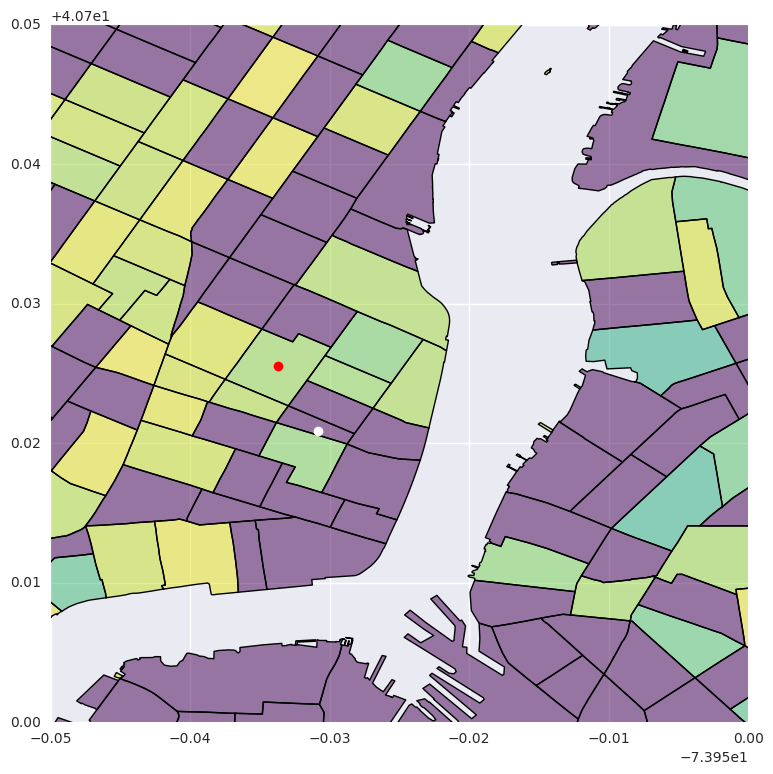

In [75]:
ct2.plot('biketrip_count', cmap=plt.cm.viridis)
plt.plot([-73.980858,], [40.720875, ] , 'o', color='white')
plt.plot(-73.98370854854818,  40.72555342330404, 'o', color='red')
plt.gcf().set_size_inches(12, 9)
plt.xlim(-74.0, -73.95)
plt.ylim(40.7, 40.75)

In [42]:
!ls

citibike_cleaning_nb.ipynb	    stations.2017.04.20.09.43.json
derby.log			    subway_test_1.ipynb
exploratory_bike_station_ids.ipynb  subway_test_2.ipynb
lowfreq_bike_stations.ipynb	    Untitled.ipynb
sql_test_1.ipynb


In [ ]:
zz = bike['trip_duration start_ct_id'.split()].groupby('start_ct_id').count().compute()

In [73]:
print(ct.geometry[9].centroid)

POINT (-73.98370854854818 40.72555342330404)


In [52]:
tz = gpd.read_file('../shapefiles/taxi_zones.shp')
tz.to_crs({'init': 'epsg:4326'})

,LocationID,OBJECTID,Shape_Area,Shape_Leng,borough,geometry,zone
0,1,1,0.000782,0.116357,EWR,"POLYGON ((-74.18445299999996 40.6949959999999,...",Newark Airport
1,2,2,0.004866,0.433470,Queens,(POLYGON ((-73.82337597260663 40.6389870471767...,Jamaica Bay
2,3,3,0.000314,0.084341,Bronx,POLYGON ((-73.84792614099985 40.87134223399991...,Allerton/Pelham Gardens
3,4,4,0.000112,0.043567,Manhattan,POLYGON ((-73.97177410965318 40.72582128133705...,Alphabet City
4,5,5,0.000498,0.092146,Staten Island,POLYGON ((-74.17421738099989 40.56256808599987...,Arden Heights
5,6,6,0.000606,0.150491,Staten Island,POLYGON ((-74.06367318899999 40.60219816599994...,Arrochar/Fort Wadsworth
6,7,7,0.000390,0.107417,Queens,POLYGON ((-73.90413637799996 40.76752031699986...,Astoria
7,8,8,0.000027,0.027591,Queens,POLYGON ((-73.92334041500001 40.77512891199993...,Astoria Park
8,9,9,0.000338,0.099784,Queens,POLYGON ((-73.78502434699996 40.76103651599986...,Auburndale
9,10,10,0.000436,0.099839,Queens,"POLYGON ((-73.7832662499999 40.68999429299992,...",Baisley Park


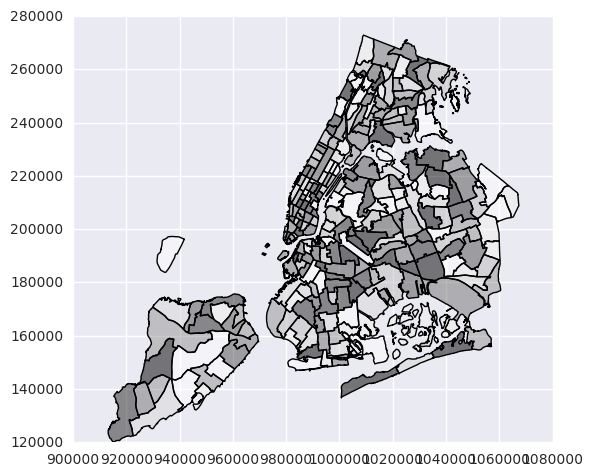

In [53]:
tz.plot()